# Analytical and numerical calculation of the order of approximation of a derivative calculated through finite differences (optional).

In [1]:
from nm_lib import nm_lib as nm
import numpy as np
import matplotlib.pyplot as plt
import threading

db = np.float64
sp = np.float32

In [2]:
def h(x, float_type):
    fl = float_type
    """This is function h(x) from eq. (1)"""
    return np.cos(np.pi * (x-fl(1))/fl(2)) * np.exp(-((x-fl(3))/fl(2.5))**2)

def dh_dx(x, float_type):
    """Derivative of h(x) w.r.t. x."""
    fl = float_type
    a = np.pi/db(2)
    b = fl(2.5)
    return (np.exp(-(x - fl(3))**2/b**2) * (a * b**2* np.sin(a - a *x) - fl(2) *(x - fl(3)) *np.cos(a *(x - fl(1)))))/b**2

def get_xx_hh_dx(nump, x0, xf, float_type):
    """This function creates the array of gridpoints for x. Then solves h(x) and creates a
       delta x. And this is xx[1]-xx[0] because it is the same for all of the grid."""
    xx = np.arange(nump, dtype=float_type)/(nump-float_type(1.0)) * (xf-x0) + x0
    hh = h(xx, float_type)
    dx = np.abs(xx[1] - xx[0])
    return xx, hh, dx

def calculate_derivative(xx, hh, dx, derivative_type, float_type):
    """Return numerical and analytical
       ha analytic, hp numerical
    """
    dx = np.roll(xx,-1) - xx
    
    hp = nm.deriv_dnw(xx, hh, **{"derivative_type":derivative_type})
    ha = dh_dx(xx + dx/float_type(2), float_type)
    return hp, ha

## 1 – The numerical test of the high-order formula

Implement the finite difference formula given by the first term on the right of Eq (5) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization)  into the program you developed for Exercise 1a and test if you get an approximation to the first derivative with an error that converges to zero like $(\Delta x)^4$.

Compare the 2nd-order and 4th-order error curves. Which error do you get in either case for 128 intervals? For 512 intervals? For 1024 intervals?

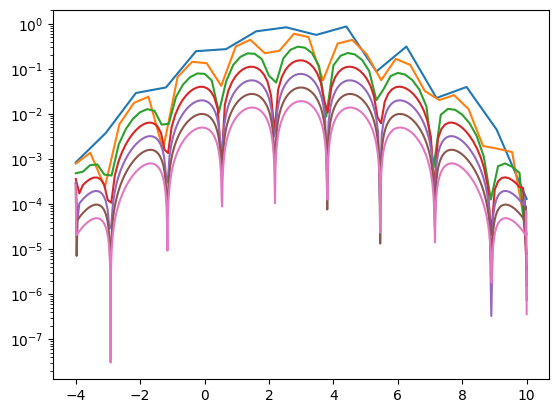

In [3]:
intervals = [2**i for i in range(4,11)]

errors_2nd = []
errors_4th = []

for ntest in intervals:
    xx, hh, dx = get_xx_hh_dx(nump=ntest, x0=db(-4.0), xf=db(10.0), float_type=db)
    
    hp, ha = calculate_derivative(xx, hh, dx, "finite", float_type=db)
    errors_2nd.append(np.sum(np.abs(hp-ha))) 
    
    hp, ha = calculate_derivative(xx, hh, dx, "higher_order", float_type=db)
    errors_4th.append(np.sum(np.abs(hp-ha))) 
    plt.semilogy(xx, np.abs(hp-ha))


<span style="color:green">JMS</span>.

<span style="color:red">consider to use mean or max instead of sum</span>.

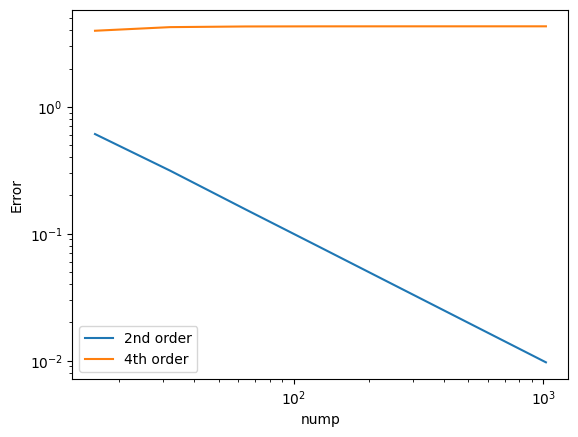

In [4]:
fig, ax = plt.subplots()
ax.loglog(intervals, errors_2nd, label="2nd order")
ax.loglog(intervals, errors_4th, label="4th order")
ax.set_xlabel("nump")
ax.set_ylabel("Error")
ax.legend()
plt.show()

<span style="color:green">JMS</span>.

<span style="color:red">explain what you have done and the results</span>.

## 2 - Precission

Try for more than $10^6$ grid points. What do you see? What happens if you try for a lower or higher floating number? Numpy uses float 64 as default. Instead, use `np.float32` and `np.float128`. Explain the error slopes. 

In [5]:
intervals2 = [2**i for i in range(5, 30)]

In [6]:
def calc_error(error_32, error_64, i):
    xx, hh, dx = get_xx_hh_dx(nump=ntest, x0=db(-4.0), xf=db(10.0), float_type=sp)
    hp, ha = calculate_derivative(xx, hh, dx, "finite", float_type=sp)
    error_32[i] = np.sum(np.abs(hp-ha))

    xx, hh, dx = get_xx_hh_dx(nump=ntest, x0=db(-4.0), xf=db(10.0), float_type=db)
    hp, ha = calculate_derivative(xx, hh, dx, "finite", float_type=db)
    error_64[i] = np.sum(np.abs(hp-ha))

<span style="color:green">JMS</span>.


<span style="color:orange">Minor comments: Add some minor comments in def functions, typically the description in functions are as follows</span>.

    r"""
    A sentences on what is the propose of the function.
    
    Requires
    ----------
    libraries or functions 

    Parameters
    ----------
    xx : `array`
        description and if applies what is the default values. 

    Returns
    ------- 
    t : `array`
        description 
    """

In [7]:
error_32 = np.zeros(len(intervals2))
error_64 = np.zeros(len(intervals2))

threads = []
for i in range(len(intervals2)):
    t = threading.Thread(target=calc_error, args=(error_32, error_64, i))
    threads.append(t)
    t.start()    

for thread in threads:
    thread.join()

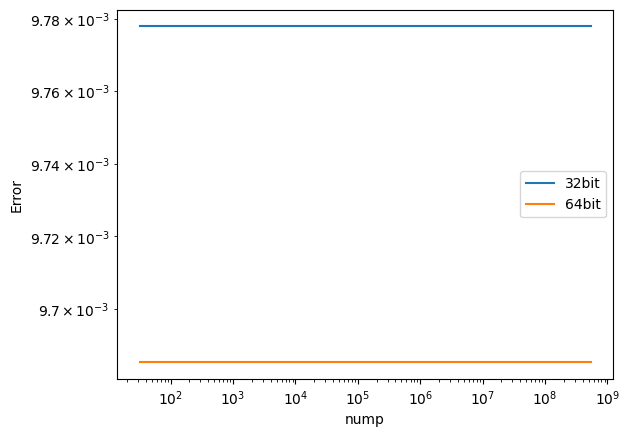

In [8]:
fig, ax = plt.subplots()
ax.loglog(intervals2, error_32, label="32bit")
ax.loglog(intervals2, error_64, label="64bit")
ax.set_xlabel("nump")
ax.set_ylabel("Error")
ax.legend()
plt.show()

<span style="color:green">JMS</span>.

<span style="color:red">explain what you have done and the results</span>.